<a href="https://colab.research.google.com/github/liyzcj/ann/blob/master/neural_network/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GAN

## Import

In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'
  
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
!pip install mnist

In [0]:
import torch
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
import torchvision.datasets as dsets

## Dataset

In [0]:
def show_mnist(X, title = None, loc = 'center',**kwargs):
    num = X.shape[0]
    if num <= 10:
        imgs = np.moveaxis(X.reshape(-1, num, 28, 28), 1, 2).reshape(-1, num * 28)
        plt.figure(figsize=(num/2,num))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 100 and num % 10 == 0:
        imgs = np.moveaxis(X.reshape(-1, 10, 28, 28), 1, 2).reshape(-1, 10 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    elif num <= 200 and num % 20 == 0:
        imgs = np.moveaxis(X.reshape(-1, 20, 28, 28), 1, 2).reshape(-1, 20 * 28)
        plt.figure(figsize=(10,20))
        if title:
            plt.title(title, kwargs, loc=loc)
        plt.axis('off')
        plt.imshow(imgs)
    else:
        print(f'{num} not fit, choose from:')
        print(list(range(1,10)))
        print([x for x in range(10,100,10)])
        print([x for x in range(100,1000,100)])
    plt.show()

### Mnist

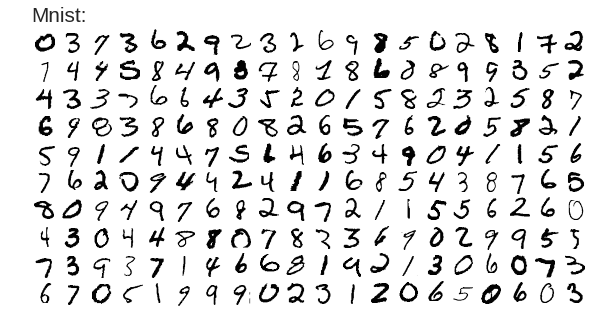

In [0]:
import mnist
mnist = mnist.train_images()
mnist = mnist.reshape(-1,784)
idxs = np.random.choice(len(mnist), 200)
show_mnist(mnist[idxs],'Mnist:',loc = 'left', fontsize = 'xx-large')
mnist = mnist/255
mnist = torch.from_numpy(mnist).float()

### Fashion-Mnist

In [0]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])

fashion_mnist = dsets.FashionMNIST(root='./data', 
                            train=True, 
                            transform=transform,
                            download=True
                           )

fmnist = fashion_mnist.train_data
fmnist = fmnist.reshape(-1,784).float()
fmnist = fmnist / 255

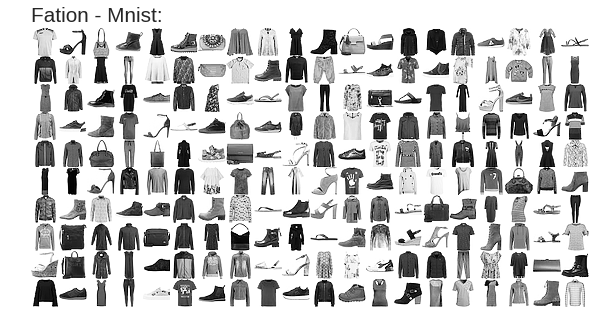

In [0]:
idxs = np.random.choice(len(fmnist), 200)
imgs = fmnist[idxs].numpy()
show_mnist(imgs,'Fation - Mnist:',loc = 'left', fontsize = 'xx-large')

## GAN

### Hyperparameters

In [0]:
mb_size = 64
Z_dim = 10
X_dim = 784
h_dim = 128
lr = 1e-2

### Generator

In [0]:
def G(z):
    h = nn.relu(z @ Wzh + bzh.repeat(z.size(0), 1))
    X = torch.sigmoid(h @ Whx + bhx.repeat(h.size(0), 1))
    return X


### Discriminator

In [0]:
def D(X):
    h = nn.relu(X @ Wxh + bxh.repeat(X.size(0), 1))
    y = torch.sigmoid(h @ Why + bhy.repeat(h.size(0), 1))
    return y

### Initial Parameters

In [0]:
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return Variable(torch.randn(*size) * xavier_stddev, requires_grad=True)
  

Wzh = xavier_init(size=[Z_dim, h_dim])
bzh = Variable(torch.zeros(h_dim), requires_grad=True)

Whx = xavier_init(size=[h_dim, X_dim])
bhx = Variable(torch.zeros(X_dim), requires_grad=True)

Wxh = xavier_init(size=[X_dim, h_dim])
bxh = Variable(torch.zeros(h_dim), requires_grad=True)

Why = xavier_init(size=[h_dim, 1])
bhy = Variable(torch.zeros(1), requires_grad=True)

G_params = [Wzh, bzh, Whx, bhx]
D_params = [Wxh, bxh, Why, bhy]
params = G_params + D_params

In [0]:
def reset_grad():
    for p in params:
        if p.grad is not None:
            data = p.grad.data
            p.grad = Variable(data.new().resize_as_(data).zero_())


G_solver = optim.Adam(G_params, lr=1e-3)
D_solver = optim.Adam(D_params, lr=1e-3)

ones_label = Variable(torch.ones(mb_size, 1))
zeros_label = Variable(torch.zeros(mb_size, 1))

### Training

Iter-0; D_loss: 1.310774803161621; G_loss: 2.621899127960205


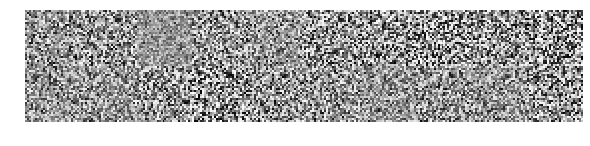

Iter-1000; D_loss: 0.12467286735773087; G_loss: 6.946396350860596


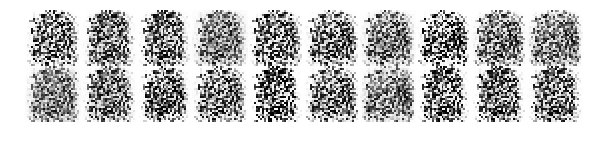

Iter-2000; D_loss: 0.36922669410705566; G_loss: 3.1392111778259277


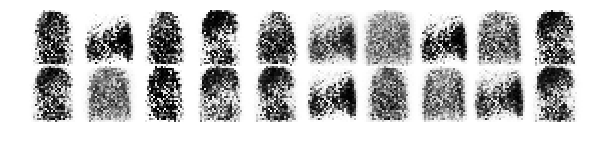

Iter-3000; D_loss: 0.4358169436454773; G_loss: 5.544160842895508


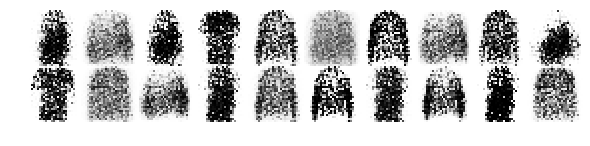

Iter-4000; D_loss: 0.1980360746383667; G_loss: 4.676591873168945


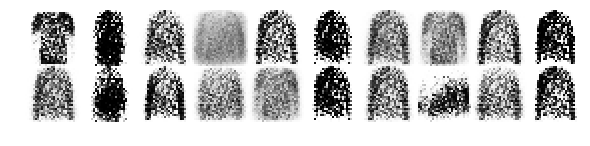

Iter-5000; D_loss: 0.7378101944923401; G_loss: 4.033894062042236


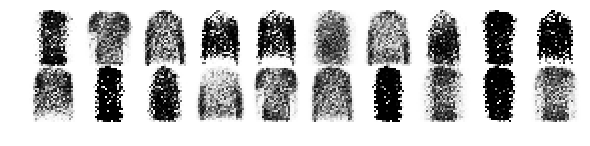

Iter-6000; D_loss: 0.4992479681968689; G_loss: 3.982407569885254


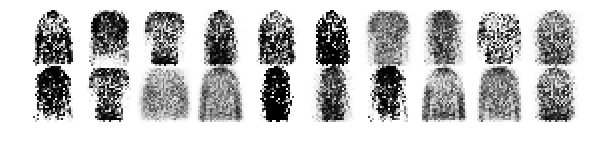

Iter-7000; D_loss: 0.28613942861557007; G_loss: 5.260103702545166


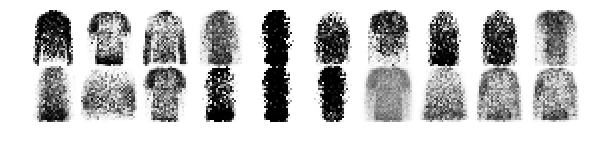

Iter-8000; D_loss: 1.0540868043899536; G_loss: 3.9974377155303955


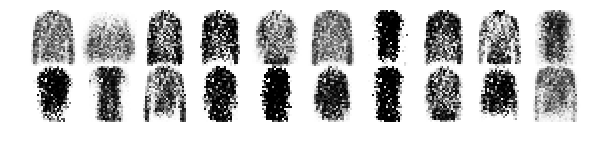

Iter-9000; D_loss: 0.589505136013031; G_loss: 3.100037097930908


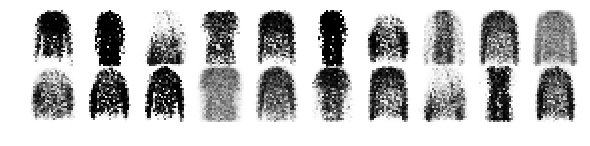

Iter-10000; D_loss: 1.3381328582763672; G_loss: 1.2163029909133911


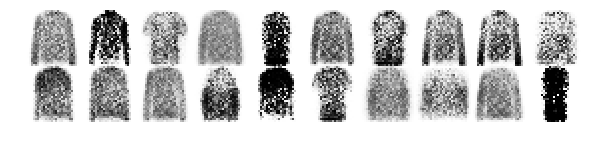

Iter-11000; D_loss: 0.48821544647216797; G_loss: 3.524716854095459


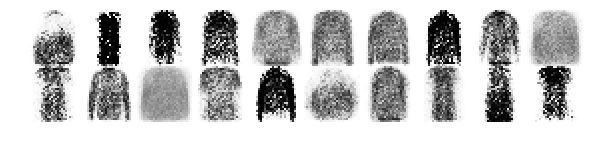

Iter-12000; D_loss: 0.45823758840560913; G_loss: 3.427751302719116


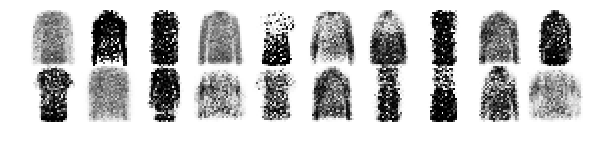

Iter-13000; D_loss: 0.6789020299911499; G_loss: 3.3913724422454834


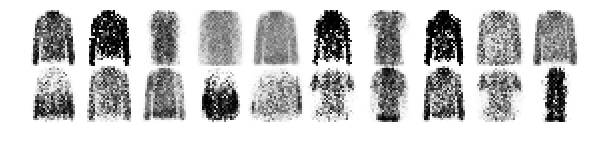

Iter-14000; D_loss: 0.919562816619873; G_loss: 4.206882476806641


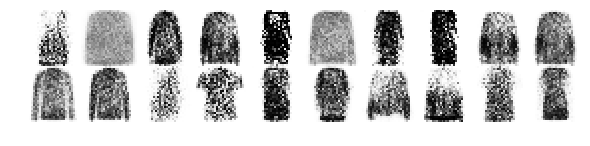

Iter-15000; D_loss: 0.7398278713226318; G_loss: 3.7949841022491455


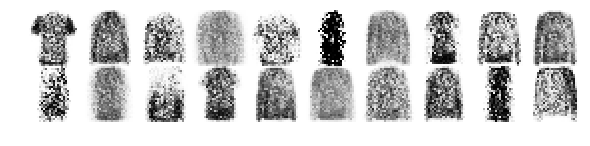

Iter-16000; D_loss: 0.5000634789466858; G_loss: 3.3448524475097656


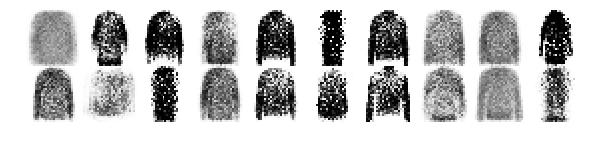

Iter-17000; D_loss: 0.40408867597579956; G_loss: 3.6900460720062256


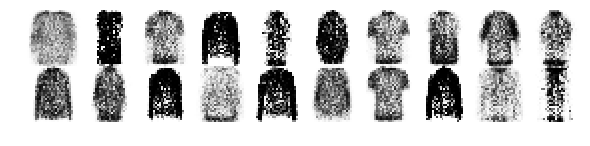

Iter-18000; D_loss: 0.9007777571678162; G_loss: 4.68614387512207


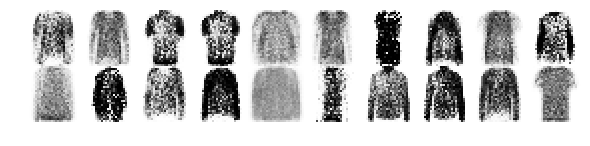

Iter-19000; D_loss: 0.6323667764663696; G_loss: 3.6821846961975098


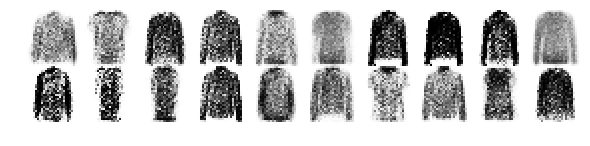

Iter-20000; D_loss: 0.7522975206375122; G_loss: 3.0707085132598877


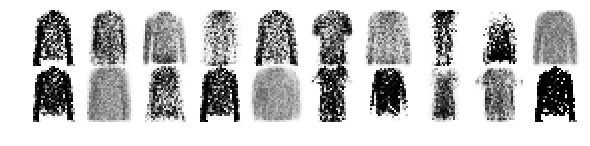

Iter-21000; D_loss: 0.8313843011856079; G_loss: 1.9929356575012207


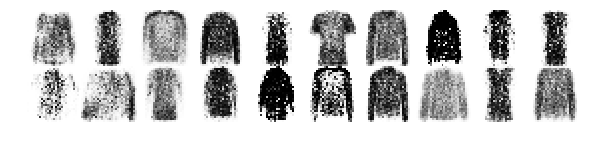

Iter-22000; D_loss: 0.7695193290710449; G_loss: 2.270321846008301


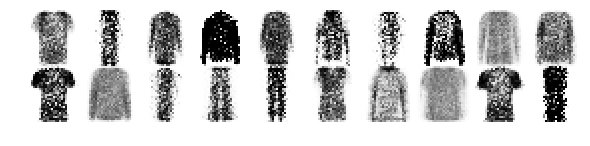

Iter-23000; D_loss: 1.0908478498458862; G_loss: 1.6972399950027466


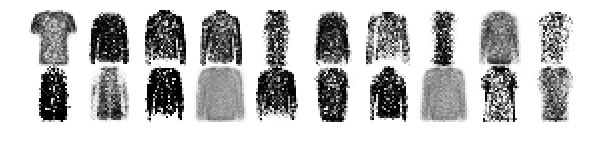

Iter-24000; D_loss: 0.8347088098526001; G_loss: 2.5721914768218994


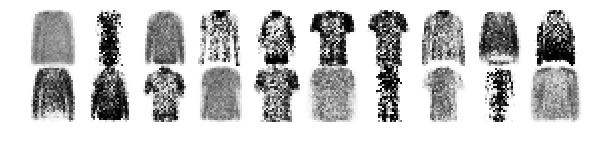

Iter-25000; D_loss: 0.9807966947555542; G_loss: 2.2749340534210205


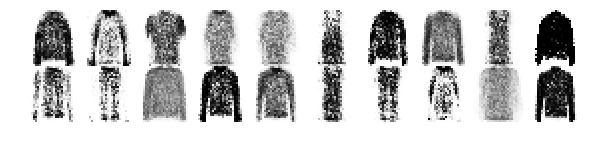

Iter-26000; D_loss: 1.2730622291564941; G_loss: 1.2384977340698242


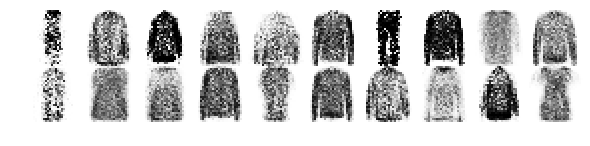

Iter-27000; D_loss: 0.6521438956260681; G_loss: 2.9890971183776855


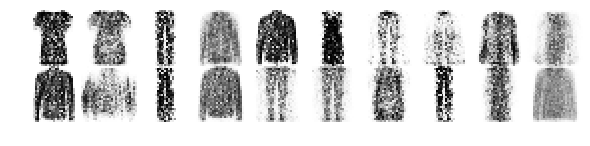

Iter-28000; D_loss: 0.8629745244979858; G_loss: 2.242748260498047


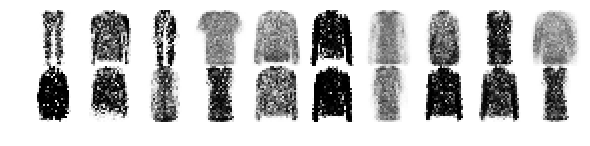

Iter-29000; D_loss: 0.5350688695907593; G_loss: 2.1776957511901855


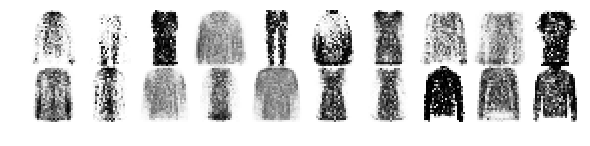

Iter-30000; D_loss: 0.5728188753128052; G_loss: 1.923095703125


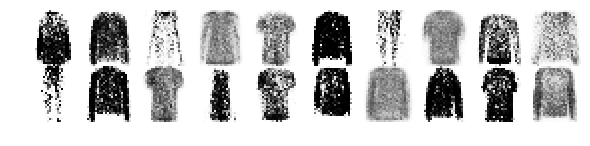

Iter-31000; D_loss: 0.5131136178970337; G_loss: 2.2550477981567383


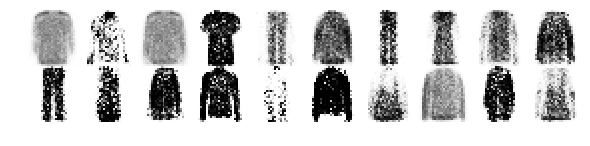

Iter-32000; D_loss: 1.2440108060836792; G_loss: 1.843445897102356


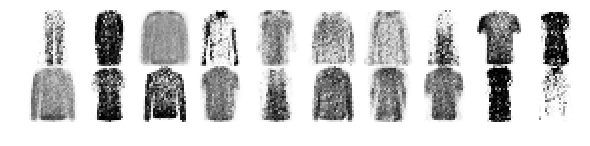

Iter-33000; D_loss: 0.8080632090568542; G_loss: 2.132814407348633


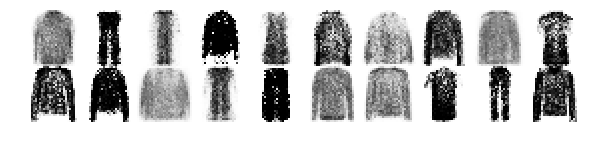

Iter-34000; D_loss: 0.923663318157196; G_loss: 1.918625831604004


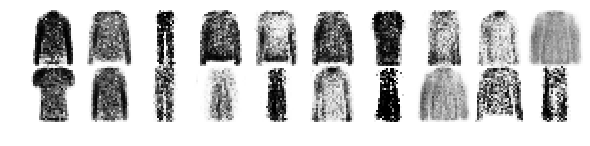

Iter-35000; D_loss: 0.7340121269226074; G_loss: 2.280750274658203


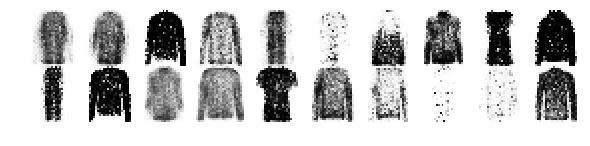

Iter-36000; D_loss: 1.0098967552185059; G_loss: 1.952045202255249


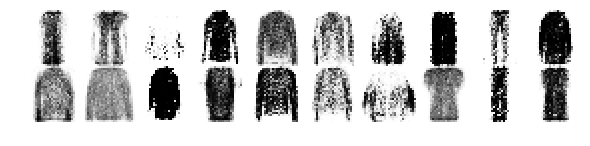

Iter-37000; D_loss: 1.1703534126281738; G_loss: 2.6190185546875


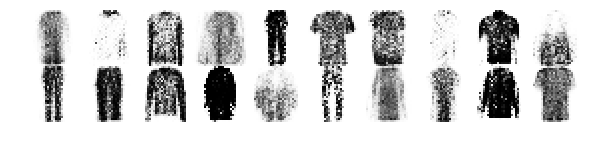

Iter-38000; D_loss: 0.6895264387130737; G_loss: 2.292543649673462


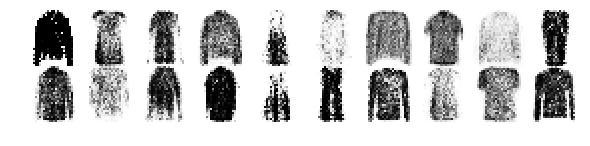

Iter-39000; D_loss: 0.7622847557067871; G_loss: 1.5495144128799438


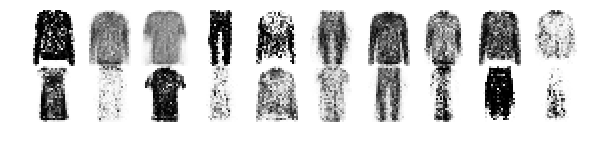

Iter-40000; D_loss: 0.8234502077102661; G_loss: 1.9417474269866943


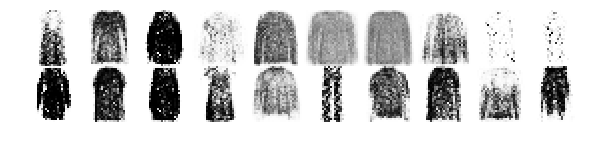

Iter-41000; D_loss: 0.8135222792625427; G_loss: 1.9985662698745728


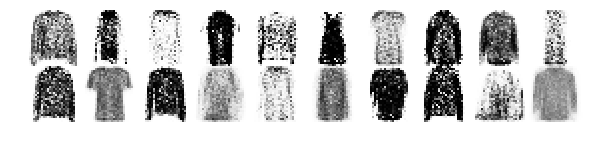

Iter-42000; D_loss: 0.9223613142967224; G_loss: 2.439913511276245


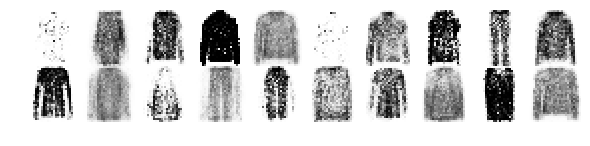

Iter-43000; D_loss: 0.8737728595733643; G_loss: 2.259289503097534


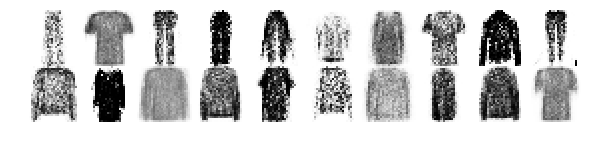

Iter-44000; D_loss: 0.8103592395782471; G_loss: 2.131842851638794


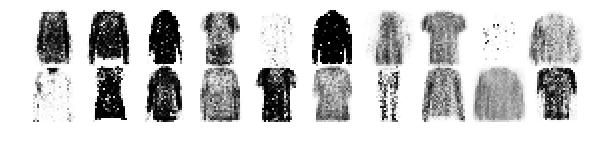

Iter-45000; D_loss: 0.8427271246910095; G_loss: 1.6561163663864136


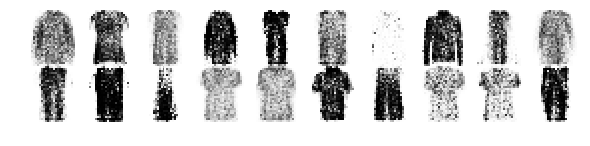

Iter-46000; D_loss: 0.6538218259811401; G_loss: 1.977429747581482


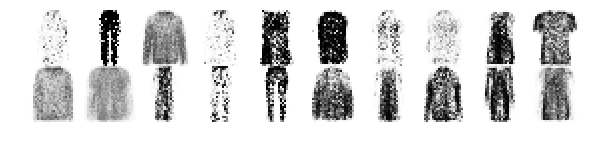

Iter-47000; D_loss: 0.6695321202278137; G_loss: 1.5408110618591309


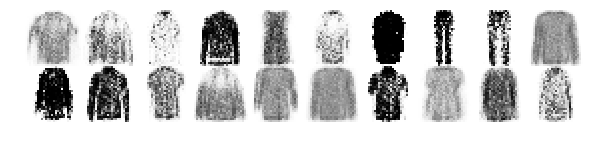

Iter-48000; D_loss: 0.7102676033973694; G_loss: 2.221128225326538


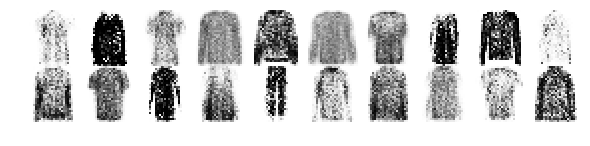

Iter-49000; D_loss: 0.7745714783668518; G_loss: 1.7779691219329834


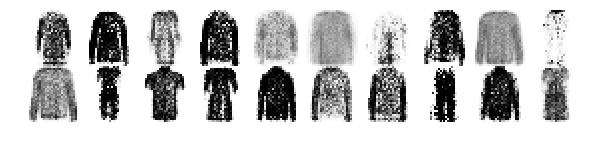

In [0]:
for it in range(50000):
    # Sample data
    z = Variable(torch.randn(mb_size, Z_dim))
    idxs = np.random.choice(60000, mb_size)
    X = Variable(fmnist[idxs])

    # Dicriminator forward-loss-backward-update
    G_sample = G(z)
    D_real = D(X)
    D_fake = D(G_sample)

    D_loss_real = nn.binary_cross_entropy(D_real, ones_label)
    D_loss_fake = nn.binary_cross_entropy(D_fake, zeros_label)
    D_loss = D_loss_real + D_loss_fake

    D_loss.backward()
    D_solver.step()

    # Housekeeping - reset gradient
    reset_grad()

    # Generator forward-loss-backward-update
    z = Variable(torch.randn(mb_size, Z_dim))
    G_sample = G(z)
    D_fake = D(G_sample)

    G_loss = nn.binary_cross_entropy(D_fake, ones_label)

    G_loss.backward()
    G_solver.step()

    # Housekeeping - reset gradient
    reset_grad()

    # Print and plot every now and then
    if it % 1000 == 0:
        print('Iter-{}; D_loss: {}; G_loss: {}'.format(it, D_loss.data.numpy(), G_loss.data.numpy()))
        samples = G(z).data.numpy()[:20]
        show_mnist(samples)